<a href="https://colab.research.google.com/github/Giovanna0110/SSF-Oto24AngelicaGiovannaLeonHernandez/blob/main/T3_SSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

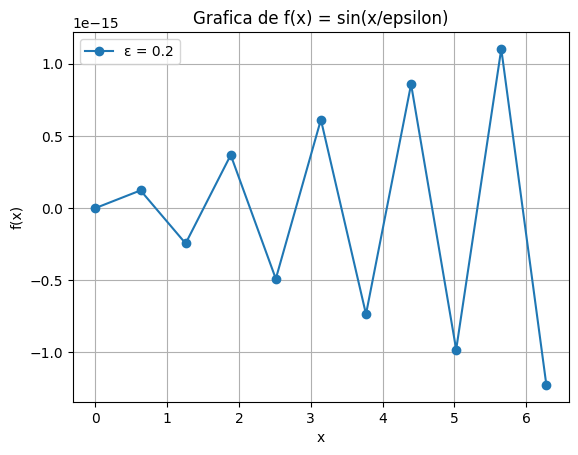

In [27]:
import numpy as np
import matplotlib.pyplot as plt #Fixed typo in module name
# definimos la funcion f(x)
def f(x, epsilon):
    return np.sin(x / epsilon)

# valores de n y epsilon
n = 10
epsilon = 1/5

# crear el rango de x desde 0 hasta 22pi
x = np.linspace(0, 2*np.pi, n+1)

# calcular f(x) para cada valor de x
y = f(x, epsilon)
# graficar la funcion
plt.plot(x, y,marker='o', label=f'ɛ = {epsilon}')
plt.title('Grafica de f(x) = sin(x/epsilon)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True) #Removed extra plt.
plt.show()

In [26]:
import numpy as np
import matplotlib.pyplot as plt #Fixed typo in module name
# definimos la funcion f(x)
def f(x, epsilon):
    return np.sin(x / epsilon)

#

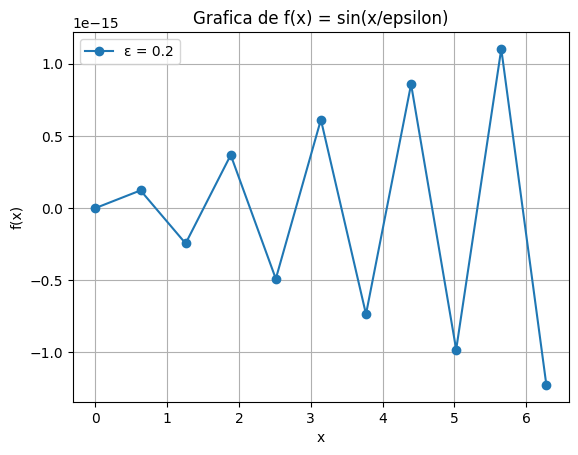

In [ ]:
import numpy as np
import matplotlib.pyplot as plt #Fixed typo in module name
# definimos la funcion f(x)
def f(x, epsilon):
    return np.sin(x / epsilon)

# valores de n y epsilon
n = 10
epsilon = 1/5

# crear el rango de x desde 0 hasta 22pi
x = np.linspace(0, 2*np.pi, n+1)

# calcular f(x) para cada valor de x
y = f(x, epsilon)
# graficar la funcion
plt.plot(x, y,marker='o', label=f'ɛ = {epsilon}')
plt.title('Grafica de f(x) = sin(x/epsilon)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True) #Removed extra plt.
plt.show()

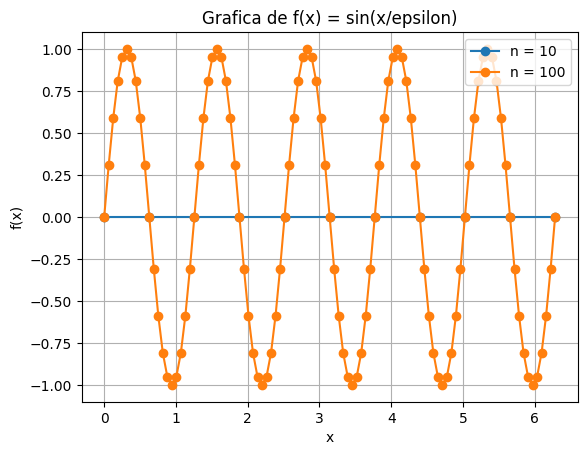

In [ ]:
# modificamos el programa para dos valores de n
n_values = [10, 100]

# graficar la funcion para cada n
for n in n_values:
    x = np.linspace(0, 2*np.pi, n+1)
    y = f(x, epsilon)
    plt.plot(x, y, marker='o', label=f'n = {n}')

plt.title('Grafica de f(x) = sin(x/epsilon)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# definimos un ciclo para encontrar el n adecuado
epsilon = 1/5
n = 10
tolerance = 0.1
max_diff = 1 # valor inicial alto

while max_diff > tolerance:
    x1 = np.linspace(0, 2*np.pi, n+1)
    x2 = np.linspace(0, 2*np.pi, 2*(n+1)) #Modified to ensure x2 has twice the number of elements as x1
    y1 = f(x1, epsilon)
    y2 = f(x2, epsilon)

    # make y2 have the same size as y1
    y2 = y2[::2] #Slice y2 to select every other element, ensuring it matches the size of y1

    # calcular la diferencia maxima
    max_diff = np.max(np.abs(y2-y1))
    n += 1

print(f"El valor de n que hace que la diferencia sea menor que {tolerance} es {n}")

El valor de n que hace que la diferencia sea menor que 0.1 es 158


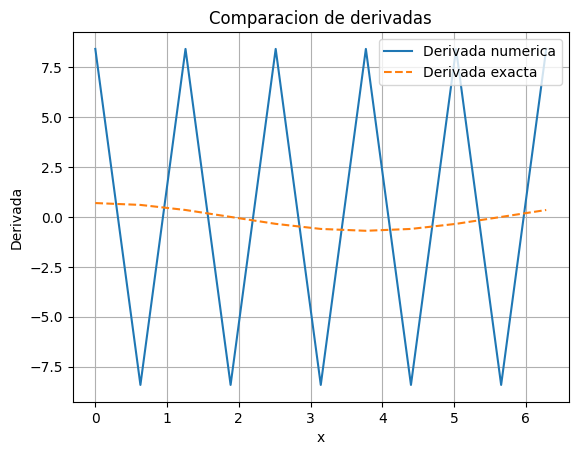

In [18]:
# definir la funcion y su derivada exacta
def f_derivada_exacta(x, epsilon):
    return np.cos(x / (1 + epsilon)) / (1 + epsilon)**2

# derivada numerica usando diferencias finitas
def derivada_numerica(f, x, h=1e-5):
    return (f(x+h, epsilon) - f(x-h, epsilon)) / h

epsilon = 1/5
n = 10
x = np.linspace(0, 2*np.pi, n+1)

# graficar derivada numerica y exacta
y_num = derivada_numerica(f, x, epsilon)
y_exact = f_derivada_exacta(x, epsilon)

plt.plot(x, y_num, label = 'Derivada numerica')
plt.plot(x, y_exact, label = 'Derivada exacta', linestyle = 'dashed')
plt.title('Comparacion de derivadas')
plt.xlabel('x')
plt.ylabel('Derivada')
plt.legend()
plt.grid(True)
plt.show()


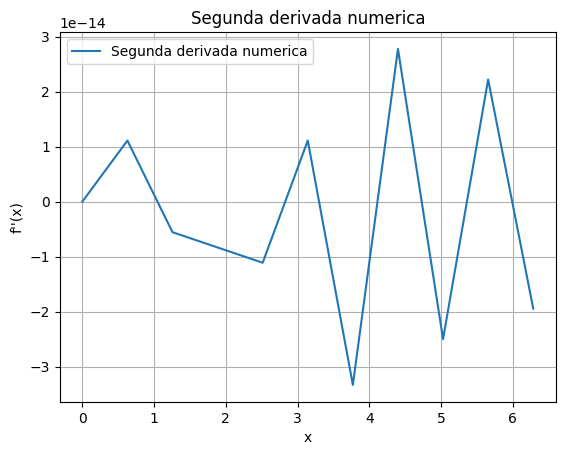

In [20]:
# segunda derivada numerica usando diferencias finitas
def segunda_derivada_numerica(f, x, h=1e-5):
    return (f(x+h, epsilon) - 2*f(x, epsilon) + f(x-h, epsilon)) / h**2

# definir valores de epsilon y n
epsilon = 1/5
n = 10
x = np.linspace(0, 2*np.pi, n+1)

# calcular segunda derivada numerica
y_num = segunda_derivada_numerica(f, x, epsilon)

# graficar la segunda derivada numerica
plt.plot(x, y_num, label='Segunda derivada numerica') # Changed y_seg_derivada to y_num
plt.title('Segunda derivada numerica')
plt.xlabel('x')
plt.ylabel('f\'\'(x)')
plt.legend()
plt.grid(True)
plt.show()

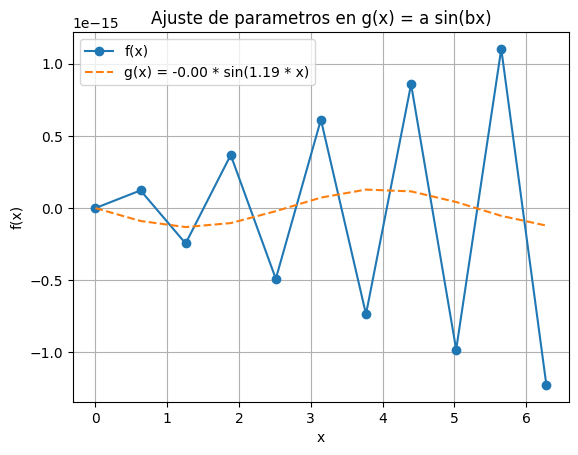

Los parametros ajustados son a = -0.0000 y b = 1.1855


In [23]:
from scipy.optimize import curve_fit

# definir la funcion g(x) = a * sin(bx)
def g(x, a, b):
    return a * np.sin(b * x)

# valores de epsilon y n
epsilon = 1/5
n = 10
x = np.linspace(0, 2*np.pi, n+1)

# obtener los valores de f(x) para ajustar g(x)
y_f = f(x, epsilon)

# ajustar g(x) a los datos de f(x)
param_opt, param_cov = curve_fit(g, x, y_f, p0=[1,1])

# extraer los parametros ajustados
a_opt, b_opt = param_opt

# graficar f(x) y g(x) con los parametros ajustados
y_g = g(x, a_opt, b_opt) # Changed a_opa_opt to a_opt

plt.plot(x, y_f, label='f(x)', marker='o')
plt.plot(x, y_g, label=f'g(x) = {a_opt:.2f} * sin({b_opt:.2f} * x)', linestyle='--') # Changed y_g_ajustada to y_g
plt.title('Ajuste de parametros en g(x) = a sin(bx)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()
print(f"Los parametros ajustados son a = {a_opt:.4f} y b = {b_opt:.4f}")